In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import os
import time
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.neighbors import KNeighborsClassifier
#Setting options
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
#Set Default option
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_rows = 3000
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [3]:
sgemm_product = pd.read_csv("C:\\Users\\14692\\Documents\\Python\\sgemm_product_dataset\\sgemm_product.csv")
sgemm_product.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [4]:
sgemm_product.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

In [5]:
# # Scaling of variables using standard scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# sgemm_product=scaler.fit_transform(sgemm_product.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'],axis=1))
# sgemm_product=pd.DataFrame(sgemm_product)

In [6]:
sgemm_product['y']=sgemm_product[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)','Run4 (ms)']].mean(axis=1)
sgemm_product

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),y
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77,17.77,17.8175
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04,36.03,36.0350
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27,35.27,35.1600
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44,28.45,28.4525


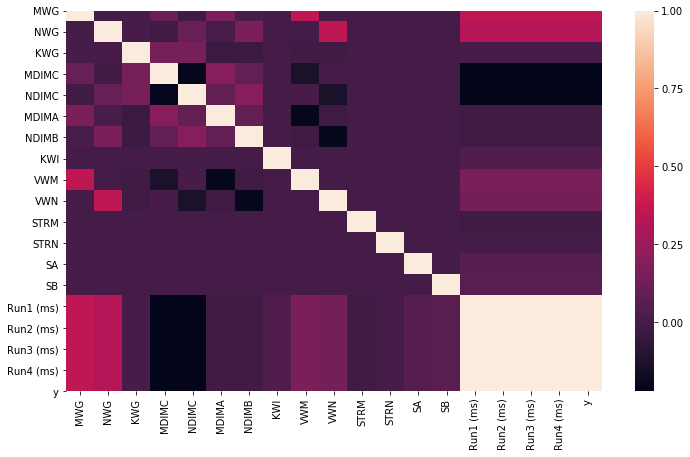

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(sgemm_product.corr())

In [8]:
sgemm_product.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
y            0
dtype: int64

In [9]:
y_hat=np.log(sgemm_product['y'])
y_mean=np.log(sgemm_product['y']).mean()
print("mean of y after taking log is coming to be",y_mean)
    
sgemm_product["y_sigmoid"]=np.log(sgemm_product['y']).apply(lambda y_hat : 1 if y_hat> 4.623067968587768 else 0)

mean of y after taking log is coming to be 4.623067968587768


In [10]:
sgemm_product_log=sgemm_product[sgemm_product['y']<=1000]
sgemm_product_log

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),y,y_sigmoid
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050,0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375,0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77,17.77,17.8175,0
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04,36.03,36.0350,0
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27,35.27,35.1600,0
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44,28.45,28.4525,0


In [11]:
sgemm_product_log['y_sigmoid'].value_counts()

0    141349
1     91693
Name: y_sigmoid, dtype: int64

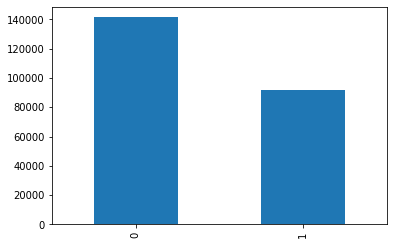

In [12]:
sgemm_product_log['y_sigmoid'].value_counts().plot(kind='bar')

In [13]:
sgemm_product_log=sgemm_product_log.drop(['Run1 (ms)', 'Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)','y'], axis=1)
sgemm_product_log

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,y_sigmoid
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,0
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,0
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,0
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,0


In [14]:
data=sgemm_product_log.copy()

In [15]:
#Resampling of data 
data=data.sample(8000,replace=True)

0    4850
1    3150
Name: y_sigmoid, dtype: int64


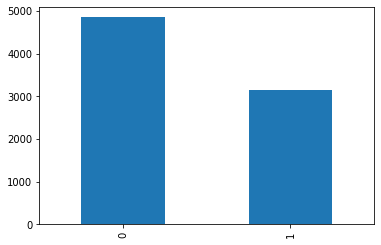

In [16]:
print(data['y_sigmoid'].value_counts())
data['y_sigmoid'].value_counts().plot(kind='bar')

In [17]:
# sns.pairplot(data, hue='y_sigmoid')

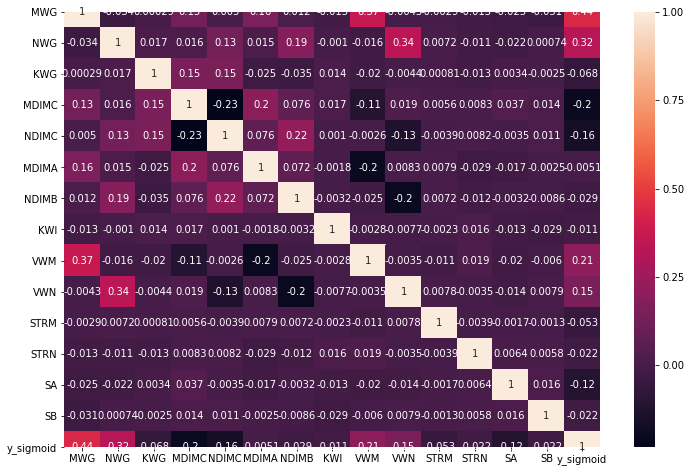

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)
#Not much correlation observered between the variables

In [19]:
#Independent Variables
X = data.drop('y_sigmoid', axis=1)
y=data['y_sigmoid']
y_pca=y.copy()
y_ann=y.copy()
X1=X.copy()

In [20]:
cols=X.columns

In [21]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

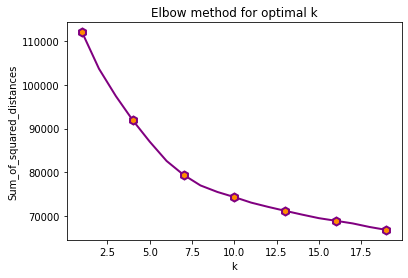

In [23]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km=km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
##Checking out which SSE is low for different types of k means value
plt.plot(K, Sum_of_squared_distances, linewidth=2,color='purple',
         marker='h', markerfacecolor='darkorange', markeredgewidth=2,
         markersize=8, markevery=3)
# plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

Accuracy: 0.05089285714285714


Text(0.5, 1.0, 'KMeans on Train Data')

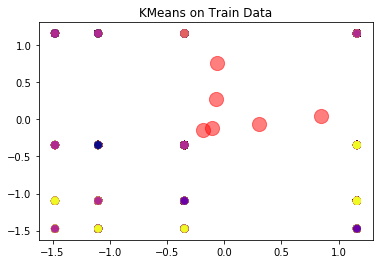

In [24]:
## K-Means Clustering Algorithm 
## Train Accuracy and Train Plot 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6) 
kmeans.fit(X_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(X_train)):
    predict_me = np.array(X_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print('Accuracy:',correct/len(X_train))
yp=kmeans.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=yp, s=50, cmap='plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans on Train Data')

Confusion Matrix: [[ 909 2486]
 [ 587 1618]]
Train Accuracy: 0.45125


Text(0.5, 1.0, 'Expectation Maximization on Train Data')

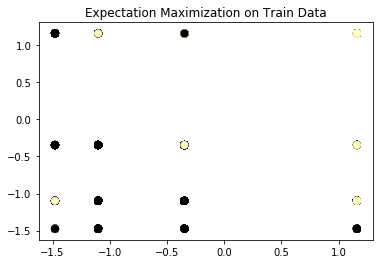

In [25]:
## Expectation maximization analysis on Train set
from sklearn.mixture import GaussianMixture
y=np.array(y_train)
y=y.astype(float)
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(X_train)
em_pred = em.predict(X_train)
#em_predict_train = [ 1 if y>=0.5 else 0 for y in em_pred]
em_predict_train= (em_pred>.5).astype('int')
em_probs = em.predict_proba(X_train)
print('Confusion Matrix:',confusion_matrix(y,em_pred))
print('Train Accuracy:',accuracy_score(y,em_pred))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, s=50, cmap='magma')
plt.title('Expectation Maximization on Train Data')

[[ 394 1061]
 [ 248  697]]
Test Accuracy: 0.45458333333333334


Text(0.5, 1.0, 'Expectation Maximization on Test Data')

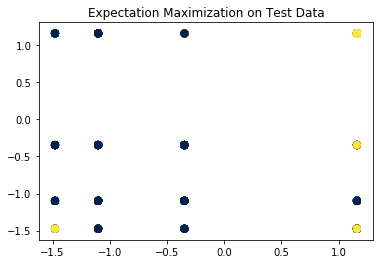

In [26]:
## Expectation maximization analysis on Test set
y=np.array(y_test)
y=y.astype(float)
em_pred1 = em.predict(X_test)
em_probs1 = em.predict_proba(X_test)
print(confusion_matrix(y,em_pred1))
print('Test Accuracy:',accuracy_score(y,em_pred1))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y, s=50, cmap='cividis')
plt.title('Expectation Maximization on Test Data')

Accuracy: 0.052083333333333336


Text(0.5, 1.0, 'KMeans on Test Data')

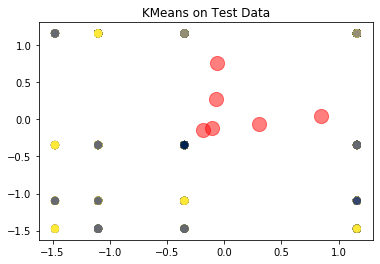

In [27]:
## Test Accuracy and Test Plot
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(X_test)):
    predict_me = np.array(X_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print('Accuracy:',correct/len(X_test))
yp=kmeans.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=yp, s=50, cmap='cividis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans on Test Data')

# Feature Selection

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True  True False  True False False False False False False False False
 False False]
Feature Ranking: [ 1  1  6  1  2 10  5  9  7  8  4 11  3 12]


[0.2358982  0.19448876 0.02214385 0.1100265  0.1103885  0.03868422
 0.03954665 0.02479539 0.06244316 0.05031495 0.02909418 0.02487558
 0.03048808 0.02681196]


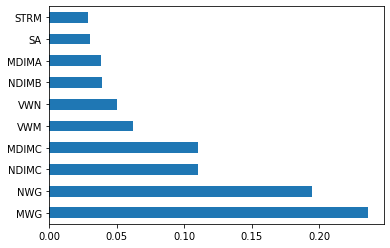

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=cols)
data1=feat_importances.nlargest(10)
data1.plot(kind='barh')
plt.show()


In [30]:
import plotly.express as px
data1=pd.DataFrame(data1, columns=['Importance'])
data1.index
fig = px.bar(data1, y=data1.index, x=data1['Importance'],
            color=data1.index, orientation='h',
              height=400)
fig.show()

# PCA

In [31]:
# X.shape
y.shape
# y = np.array(data['y_sigmoid'])

(2400,)

In [80]:
X_train_pca

array([[-0.34743696,  1.15691266,  0.8377145 , ...,  0.98757716,
         1.03563452, -0.99975003],
       [-0.34743696, -0.34654759, -1.19372412, ...,  0.98757716,
        -0.96559161, -0.99975003],
       [ 1.16069959,  1.15691266,  0.8377145 , ..., -1.01257911,
         1.03563452,  1.00025003],
       ...,
       [ 1.16069959,  1.15691266, -1.19372412, ...,  0.98757716,
         1.03563452,  1.00025003],
       [-1.10150523,  1.15691266,  0.8377145 , ..., -1.01257911,
        -0.96559161, -0.99975003],
       [-1.47853937, -0.34654759, -1.19372412, ...,  0.98757716,
        -0.96559161,  1.00025003]])

In [32]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y_pca, test_size=0.3, random_state=1)

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca_X_train=pca.fit_transform(X_train_pca)
pca_X_test=pca.fit_transform(X_test_pca)

In [34]:
pca.get_covariance()

array([[ 1.00348952, -0.05801633, -0.00136247,  0.11381216,  0.00892487,
         0.14862044,  0.02332048, -0.00151429,  0.39933923, -0.02277271,
        -0.02832443,  0.01187067, -0.02621435, -0.03050849],
       [-0.05801633,  1.00930502,  0.02717649,  0.00539017,  0.12714861,
         0.01815025,  0.18025432, -0.01233225, -0.02561845,  0.34101701,
         0.00437185, -0.01062932, -0.00547669, -0.00994055],
       [-0.00136247,  0.02717649,  0.99773985,  0.13149885,  0.16734376,
        -0.02631318, -0.0838705 ,  0.00633616, -0.02419352,  0.01452168,
         0.00210853, -0.020949  ,  0.01419447,  0.00299762],
       [ 0.11381216,  0.00539017,  0.13149885,  1.01292801, -0.25077839,
         0.18252353,  0.08572731,  0.02214885, -0.10423524, -0.01574617,
         0.02006782,  0.0226361 ,  0.04062067,  0.02131001],
       [ 0.00892487,  0.12714861,  0.16734376, -0.25077839,  1.01738054,
         0.0765126 ,  0.18685436,  0.02608096,  0.01511263, -0.11119854,
        -0.00619736, -0.01

In [35]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.10381385, 0.09937577, 0.09705196, 0.09290056, 0.0793174 ,
       0.07614908, 0.07315363, 0.0710497 , 0.06898921, 0.06688687,
       0.06548627, 0.03597452, 0.03592747, 0.03392372])

In [36]:
explained_variance=pd.DataFrame(explained_variance, index=cols)

In [37]:
explained_variance=explained_variance.rename(index={0: 'Variance'})

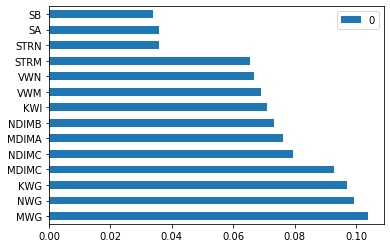

In [38]:
explained_variance.plot(kind='barh')

In [39]:
pca.get_covariance()

array([[ 1.00348952, -0.05801633, -0.00136247,  0.11381216,  0.00892487,
         0.14862044,  0.02332048, -0.00151429,  0.39933923, -0.02277271,
        -0.02832443,  0.01187067, -0.02621435, -0.03050849],
       [-0.05801633,  1.00930502,  0.02717649,  0.00539017,  0.12714861,
         0.01815025,  0.18025432, -0.01233225, -0.02561845,  0.34101701,
         0.00437185, -0.01062932, -0.00547669, -0.00994055],
       [-0.00136247,  0.02717649,  0.99773985,  0.13149885,  0.16734376,
        -0.02631318, -0.0838705 ,  0.00633616, -0.02419352,  0.01452168,
         0.00210853, -0.020949  ,  0.01419447,  0.00299762],
       [ 0.11381216,  0.00539017,  0.13149885,  1.01292801, -0.25077839,
         0.18252353,  0.08572731,  0.02214885, -0.10423524, -0.01574617,
         0.02006782,  0.0226361 ,  0.04062067,  0.02131001],
       [ 0.00892487,  0.12714861,  0.16734376, -0.25077839,  1.01738054,
         0.0765126 ,  0.18685436,  0.02608096,  0.01511263, -0.11119854,
        -0.00619736, -0.01

In [40]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.10381385, 0.09937577, 0.09705196, 0.09290056, 0.0793174 ,
       0.07614908, 0.07315363, 0.0710497 , 0.06898921, 0.06688687,
       0.06548627, 0.03597452, 0.03592747, 0.03392372])

In [41]:
import plotly.graph_objects as go

explained_variance=explained_variance.astype(list)

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar( y=explained_variance)])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1, opacity=0.6)
fig.update_layout(title_text='Variance of individual features')
fig.show()

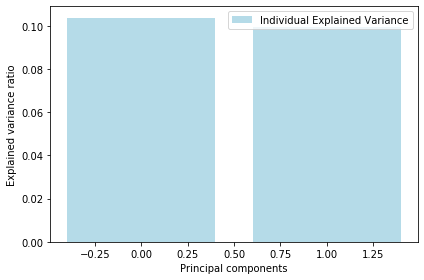

In [42]:
pca = PCA(n_components=2)
pca_X_train=pca.fit_transform(X_train_pca)
pca_X_test=pca.fit_transform(X_test_pca)

pca.get_covariance()

explained_variance=pca.explained_variance_ratio_
explained_variance

with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(2), explained_variance, alpha=0.9, align='center', color='lightblue',
            label='Individual Explained Variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

# K-Means with PCA

0.19375


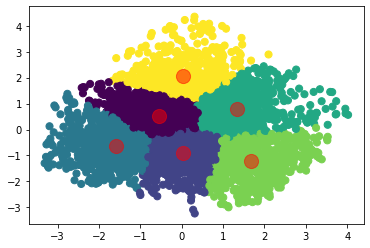

In [43]:
## K-Means Clustering Algorithm 
## Train Accuracy and Train Plot 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6) 
kmeans.fit(pca_X_train)
y=np.array(y_train_pca)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(pca_X_train)):
    predict_me = np.array(pca_X_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(pca_X_train))
yp=kmeans.predict(pca_X_train)
plt.scatter(pca_X_train[:, 0], pca_X_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

0.22791666666666666


Text(0.5, 1.0, 'KMeans with PCA')

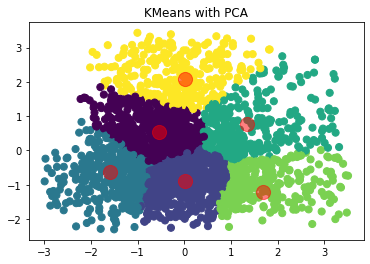

In [44]:
## Test Accuracy and Test Plot 
y=np.array(y_test_pca)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(pca_X_test)):
    predict_me = np.array(pca_X_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(pca_X_test))
yp=kmeans.predict(pca_X_test)
plt.scatter(pca_X_test[:, 0], pca_X_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans with PCA')

# EM with PCA

[[2476  919]
 [1630  575]]
0.5448214285714286


Text(0.5, 1.0, 'Expectation Maximization')

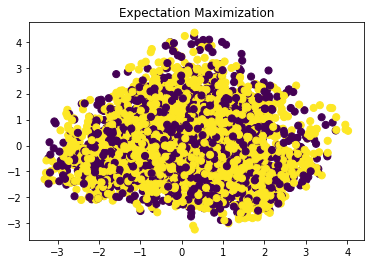

In [45]:
## Train Data
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(pca_X_train)
em_pred = em.predict(pca_X_train)
em_probs = em.predict_proba(pca_X_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(pca_X_train[:, 0], pca_X_train[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[1082  373]
 [ 704  241]]
0.55125


Text(0.5, 1.0, 'Expectation Maximization with PCA')

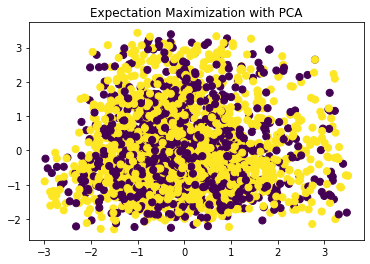

In [46]:
## Test Data 
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(pca_X_test)
em_probs = em.predict_proba(pca_X_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(pca_X_test[:, 0], pca_X_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization with PCA')

# ICA

In [47]:
##ICA
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=2, random_state=12) 
ica_X_train=ICA.fit_transform(X_train)
ica_X_test=ICA.fit_transform(X_test)

In [81]:
ica_X_train

array([[ 0.02196387,  0.01979372],
       [-0.01331532,  0.01070007],
       [-0.00508246, -0.00914507],
       ...,
       [ 0.00399507,  0.00289984],
       [ 0.00634879,  0.00473334],
       [-0.00523754, -0.00408398]])

# K-means with ICA

0.18375


Text(0.5, 1.0, 'KMeans')

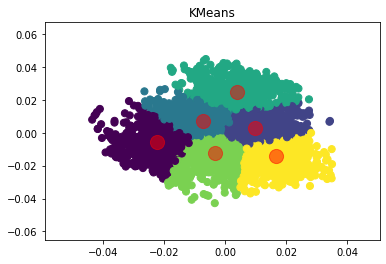

In [48]:
## K-Means Clustering Algorithm using ICA
## Train Accuracy and Train Plot 
kmeans.fit(ica_X_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(ica_X_train)):
    predict_me = np.array(ica_X_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(ica_X_train))
yp=kmeans.predict(ica_X_train)
plt.scatter(ica_X_train[:, 0], ica_X_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

0.12791666666666668


Text(0.5, 1.0, 'KMeans with ICA')

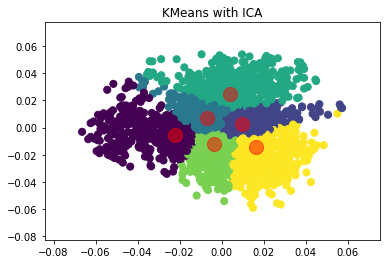

In [49]:
## Test Accuracy and Test Plot 
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(ica_X_test)):
    predict_me = np.array(ica_X_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(ica_X_test))
yp=kmeans.predict(ica_X_test)
plt.scatter(ica_X_test[:, 0], ica_X_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans with ICA')

# EM with ICA

[[1031 2364]
 [ 541 1664]]
0.48125


Text(0.5, 1.0, 'Expectation Maximization')

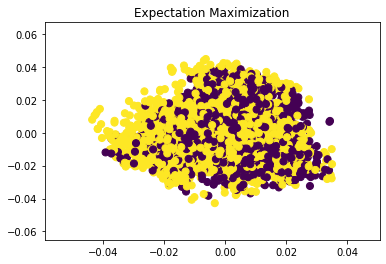

In [50]:
## Analysis of ICA
## Train Data
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(ica_X_train)
em_pred = em.predict(ica_X_train)
em_probs = em.predict_proba(ica_X_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(ica_X_train[:, 0], ica_X_train[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[ 363 1092]
 [ 423  522]]
0.36875


Text(0.5, 1.0, 'Expectation Maximization with ICA')

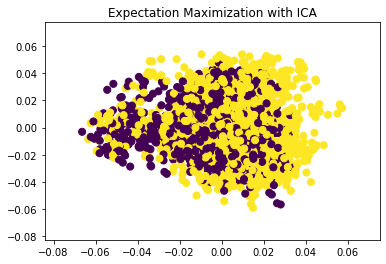

In [51]:
## Test Data
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(ica_X_test)
em_probs = em.predict_proba(ica_X_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(ica_X_test[:, 0], ica_X_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization with ICA')

# RCA

In [52]:
from sklearn.random_projection import GaussianRandomProjection
rca = GaussianRandomProjection(n_components=2, eps=0.1, random_state=420)
rca_X_train=rca.fit_transform(X_train)
rca_X_test=rca.fit_transform(X_test)

# K-means with RCA

0.1675


Text(0.5, 1.0, 'KMeans')

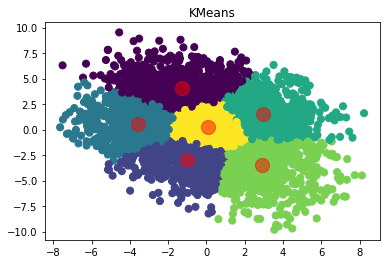

In [53]:
## K-Means Clustering Algorithm using RCA
## Train Accuracy and Train Plot 
kmeans.fit(rca_X_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(rca_X_train)):
    predict_me = np.array(rca_X_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(rca_X_train))
yp=kmeans.predict(rca_X_train)
plt.scatter(rca_X_train[:, 0], rca_X_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

0.17208333333333334


Text(0.5, 1.0, 'KMeans Test with RCA')

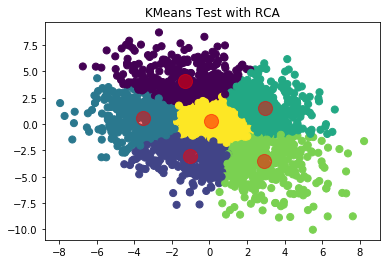

In [54]:
## Test Accuracy and Test Plot 
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(rca_X_test)):
    predict_me = np.array(rca_X_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(rca_X_test))
yp=kmeans.predict(rca_X_test)
plt.scatter(rca_X_test[:, 0], rca_X_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans Test with RCA')

# EM with RCA

[[1990 1405]
 [1237  968]]
0.5282142857142857


Text(0.5, 1.0, 'Expectation Maximization')

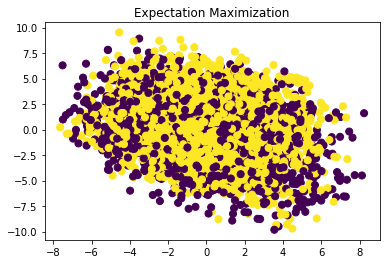

In [55]:
## Analysis of RCA
## Train Data
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(rca_X_train)
em_pred = em.predict(rca_X_train)
em_probs = em.predict_proba(rca_X_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(rca_X_train[:, 0], rca_X_train[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[856 599]
 [547 398]]
0.5225


Text(0.5, 1.0, 'Expectation Maximization with RCA')

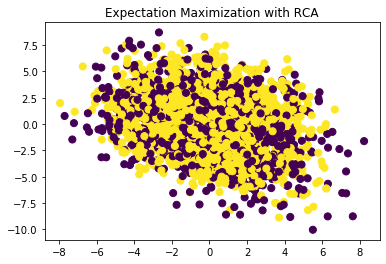

In [56]:
## Test Data
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(rca_X_test)
em_probs = em.predict_proba(rca_X_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(rca_X_test[:, 0], rca_X_test[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization with RCA')

# Feature selection

In [57]:
##Feature Selection
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),  
           k_features=10,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=3)
features = feature_selector.fit(X_train,y_train)
filtered_features= cols[list(features.k_feature_idx_)] 
filtered_features


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   15.4s finished

[2020-05-06 22:23:18] Features: 1/10 -- score: 0.74159111240305[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   11.2s finished

[2020-05-06 22:23:29] Features: 2/10 -- score: 0.8389221046321257[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   11.4s finished

[2020-05-06 22:23:40] Features: 3/10 -- score: 0.8963448895902029[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'VWM', 'VWN', 'STRM', 'SA',
       'SB'],
      dtype='object')

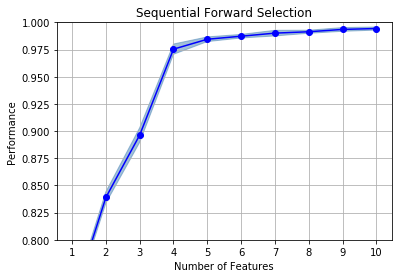

In [58]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(feature_selector.get_metric_dict(), alpha=0.5,
                kind='std_dev',
                figsize=(6, 4))

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [59]:
## Performing PCA, ICA and Randomized Projections
x=X1[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'VWM', 'VWN']]
x_std= preprocessing.StandardScaler().fit_transform(x)
x_std
y = np.array(y)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x_std, y_ann, test_size=0.3, random_state=1)

# k-means with Feature Selection

0.2830357142857143


Text(0.5, 1.0, 'KMeans')

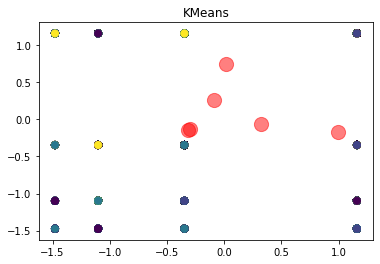

In [61]:
## K-Means Clustering Algorithm using RCA
## Train Accuracy and Train Plot 
kmeans.fit(X_train)
y=np.array(y_train)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(X_train)):
    predict_me = np.array(X_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(X_train))
yp=kmeans.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans')

0.295


Text(0.5, 1.0, 'KMeans with Feature Selection')

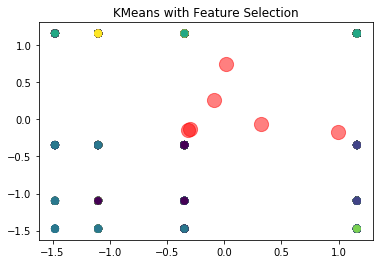

In [62]:
## Test Accuracy and Test Plot 
y=np.array(y_test)
y=y.astype(float)
correct = 0
prediction=[]
for i in range(len(X_test)):
    predict_me = np.array(X_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction.append(kmeans.predict(predict_me))
    if prediction[i] == y[i]:
        correct += 1
print(correct/len(X_test))
yp=kmeans.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans with Feature Selection')

# EM with Feature Selection

[[2580  813]
 [ 793 1414]]
0.7132142857142857


Text(0.5, 1.0, 'Expectation Maximization')

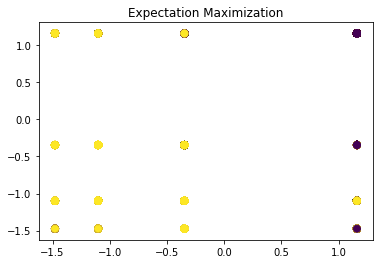

In [63]:
## Analysis of RCA
## Train Data
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
y=np.array(y_train)
y=y.astype(float)
em.fit(X_train)
em_pred = em.predict(X_train)
em_probs = em.predict_proba(X_train)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y, s=50, cmap='viridis_r')
plt.title('Expectation Maximization')

[[1143  314]
 [ 324  619]]
0.7341666666666666


Text(0.5, 1.0, 'Expectation Maximization with Feature Selection')

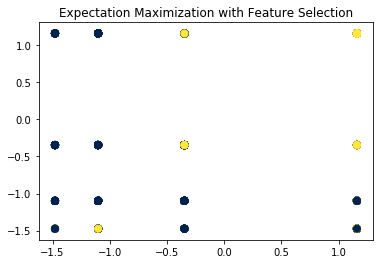

In [64]:
## Test Data 
y=np.array(y_test)
y=y.astype(float)
em_pred = em.predict(X_test)
em_probs = em.predict_proba(X_test)
print(confusion_matrix(y,em_pred))
print(accuracy_score(y,em_pred))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y, s=50, cmap='cividis')
plt.title('Expectation Maximization with Feature Selection')

# ANN with PCA

In [65]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X, y_ann, test_size=0.3, random_state=1)

In [66]:
#Scaling
X_train_ann = sc.fit_transform(X_train_ann)
X_test_ann = sc.fit_transform(X_test_ann)

In [67]:
### Performing Neural Networks with PCA
input_shap=2
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(12, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'Adadelta',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(pca_X_train, y_train_ann, batch_size = 10, epochs = 50)
y_predict = classifier.predict(pca_X_test)
y_predict = [ 1 if y>=0.5 else 0 for y in y_predict]
y_test_array=np.array(y_test_ann)
y_test_array= y_test_array.astype(float)
print('Confusion Matrix:',confusion_matrix(y_test_array,y_predict))  
print('Classification Report:',classification_report(y_test_array,y_predict))
acc_score=accuracy_score(y_test_array,y_predict)
print('Accuracy:',acc_score)
y_predict_train=classifier.predict(pca_X_train)
y_predict_train = [ 1 if y>=0.5 else 0 for y in y_predict_train]
y_train_array=np.array(y_train_ann)
y_train_array= y_train_array.astype(float)
print(confusion_matrix(y_train_array,y_predict_train))  
print(classification_report(y_train_array,y_predict_train))
acc_score1=accuracy_score(y_train_array,y_predict_train)
print(acc_score1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
5600/5600 [==============================] - ETA: 0s - loss: 0.6648 - accuracy: 0.60 - 1s 185us/step - loss: 0.6644 - accuracy: 0.6075
Epoch 2/50
5600/5600 [==============================] - 1s 149us/step - loss: 0.6524 - accuracy: 0.6186
Epoch 3/50
5600/5600 [==============================] - ETA: 0s - loss: 0.6544 - accuracy: 0.62 - 1s 170us/step - loss: 0.6538 - accuracy: 0.6200
Epoch 4/50
5600/5600 [==============================] - 1s 168us/step - loss: 0.6533 - accuracy: 0.6186
Epoch 5/50
5600/5600 [==============================] - 1s 141us/step - loss: 0.6531 - accuracy: 0.6161
Epoch 6/50
5600/5600 [==============================] - 1s 154us/step - loss: 0.6530 - accuracy: 0.6175
Epoch 7/50
5600/5600 [==============================] - 1s 145us/step - loss: 0.6527 - accuracy: 0.6200
Epoch 8/50
5600/5600 [==============================] - 1s 141us/step - loss: 0.6531 - accurac

In [68]:
### Performing Neural Networks with ICA
input_shap=2
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(12, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'Adadelta',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(ica_X_train, y_train, batch_size = 10, epochs = 50)
y_predict = classifier.predict(ica_X_test)
y_predict = [ 1 if y>=0.5 else 0 for y in y_predict]
y_test_array=np.array(y_test_ann)
y_test_array= y_test_array.astype(float)
print('Confusion Matrix:',confusion_matrix(y_test_array,y_predict))  
print('Classification Report:',classification_report(y_test_array,y_predict))
acc_score=accuracy_score(y_test_array,y_predict)
print('Accuracy:',acc_score)
y_predict_train=classifier.predict(ica_X_train)
y_predict_train = [ 1 if y>=0.5 else 0 for y in y_predict_train]
y_train_array=np.array(y_train_ann)
y_train_array= y_train_array.astype(float)
print(confusion_matrix(y_train_array,y_predict_train))  
print(classification_report(y_train_array,y_predict_train))
acc_score1=accuracy_score(y_train_array,y_predict_train)
print(acc_score1)

Epoch 1/50
5600/5600 [==============================] - 1s 179us/step - loss: 0.6744 - accuracy: 0.6059
Epoch 2/50
5600/5600 [==============================] - 1s 139us/step - loss: 0.6710 - accuracy: 0.6059
Epoch 3/50
5600/5600 [==============================] - 1s 138us/step - loss: 0.6707 - accuracy: 0.6059
Epoch 4/50
5600/5600 [==============================] - 1s 135us/step - loss: 0.6710 - accuracy: 0.6059
Epoch 5/50
5600/5600 [==============================] - 1s 131us/step - loss: 0.6709 - accuracy: 0.6059
Epoch 6/50
5600/5600 [==============================] - 1s 137us/step - loss: 0.6710 - accuracy: 0.6059
Epoch 7/50
5600/5600 [==============================] - 1s 148us/step - loss: 0.6709 - accuracy: 0.6059
Epoch 8/50
5600/5600 [==============================] - 1s 150us/step - loss: 0.6709 - accuracy: 0.6059
Epoch 9/50
5600/5600 [==============================] - 1s 186us/step - loss: 0.6708 - accuracy: 0.6059
Epoch 10/50
5600/5600 [==============================] - 1s 160u

In [69]:
### Performing Neural Networks with RCA
input_shap=2
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(12, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'Adadelta',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(rca_X_train, y_train_ann, batch_size = 10, epochs = 50)
y_predict = classifier.predict(rca_X_test)
y_predict = [ 1 if y>=0.5 else 0 for y in y_predict]
y_test_array=np.array(y_test_ann)
y_test_array= y_test_array.astype(float)
print('Confusion Matrix:',confusion_matrix(y_test_array,y_predict))  
print('Classification Report:',classification_report(y_test_array,y_predict))
acc_score=accuracy_score(y_test_array,y_predict)
print('Accuracy:',acc_score)
y_predict_train=classifier.predict(rca_X_train)
y_predict_train = [ 1 if y>=0.5 else 0 for y in y_predict_train]
y_train_array=np.array(y_train_ann)
y_train_array= y_train_array.astype(float)
print(confusion_matrix(y_train_array,y_predict_train))  
print(classification_report(y_train_array,y_predict_train))
acc_score1=accuracy_score(y_train_array,y_predict_train)
print(acc_score1)

Epoch 1/50
5600/5600 [==============================] - 1s 183us/step - loss: 0.6747 - accuracy: 0.6050
Epoch 2/50
5600/5600 [==============================] - 1s 148us/step - loss: 0.6709 - accuracy: 0.6059
Epoch 3/50
5600/5600 [==============================] - 1s 150us/step - loss: 0.6711 - accuracy: 0.6059
Epoch 4/50
5600/5600 [==============================] - 1s 177us/step - loss: 0.6710 - accuracy: 0.6059
Epoch 5/50
5600/5600 [==============================] - 1s 156us/step - loss: 0.6710 - accuracy: 0.6059
Epoch 6/50
5600/5600 [==============================] - 1s 152us/step - loss: 0.6710 - accuracy: 0.6059
Epoch 7/50
5600/5600 [==============================] - 1s 157us/step - loss: 0.6708 - accuracy: 0.6059
Epoch 8/50
5600/5600 [==============================] - 1s 166us/step - loss: 0.6710 - accuracy: 0.6059
Epoch 9/50
5600/5600 [==============================] - 1s 174us/step - loss: 0.6709 - accuracy: 0.6059
Epoch 10/50
5600/5600 [==============================] - 1s 173u

In [70]:
import plotly.graph_objects as go

algos = ['PCA','ICA','RCA']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=algos,
    y=[0.6204, 0.4559, 0.6204167],
    name='Train accuracy',
    marker_color='indianred', width=0.26
))
fig.add_trace(go.Bar(
    x=algos,
    y=[0.615, 0.7145, 0.610179],
    name='Test Accuracy',
    marker_color='lightsalmon',width=0.2, 
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='overlay', xaxis_tickangle=-45)
fig.show()

Text(0.5, 1.0, 'Train and Test Accuracy of K-Means with PCA,ICA,RCA & ANN(pca)')

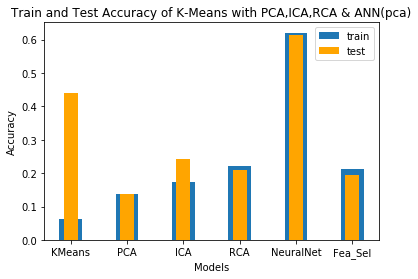

In [71]:
### Train and Test Error graph between all the algorithms
train_accuracy = [0.0635,0.1389,0.1725,0.2222,0.6204,0.213]
test_accuracy=[0.44,0.1366,0.2434,0.21,0.615,0.1954]
Models =['KMeans','PCA','ICA','RCA','NeuralNet', 'Fea_Sel']
plt.bar(Models,train_accuracy,label='train',width=0.4)
plt.bar(Models,test_accuracy,label='test',width=0.25, color='orange')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Train and Test Accuracy of K-Means with PCA,ICA,RCA & ANN(pca)")

Text(0.5, 1.0, 'Train and Test Accuracy of EM with PCA,ICA,RCA & ANN(pca)')

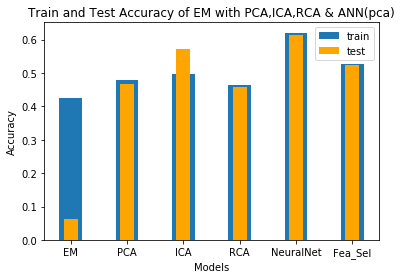

In [72]:
 ### Train and Test Error graph between all the algorithms
train_accuracy = [0.4258,0.478,0.498,0.4648,0.6204,0.526]
test_accuracy=[0.0629,0.4679,0.5716,0.4591,0.615,0.52291]
Models =['EM','PCA','ICA','RCA','NeuralNet','Fea_Sel']
plt.bar(Models,train_accuracy,label='train',width=0.4)
plt.bar(Models,test_accuracy,label='test',width=0.25, color='orange')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Train and Test Accuracy of EM with PCA,ICA,RCA & ANN(pca)")

# Taking features from K-means in task(1)

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(pca_X_train)
kmeans=kmeans.predict(pca_X_train)
em.fit(pca_X_train)
probs_em=em.predict_proba(pca_X_train)
new = pd.DataFrame()
d = pd.DataFrame({"KM_Pred": kmeans,"EM_Prob": probs_em[:,1],"y": y_train})
new=new.append(d)

In [74]:
d

,KM_Pred,EM_Prob,y
139886,5,0.944773,0
90532,1,0.008887,0
235627,1,0.012932,0
64869,5,0.730162,0
12882,1,0.035676,0
...,...,...,...
4639,1,0.024120,0
129627,3,0.012175,0
210375,0,0.276535,1
57440,3,0.013071,0


In [75]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_X_test)
kmeans1=kmeans.predict(pca_X_test)
em.fit(pca_X_test)
probs_em1=em.predict_proba(pca_X_test)
new1 = pd.DataFrame()
d1 = pd.DataFrame({"KM_Pred": kmeans1,"EM_Prob": probs_em1[:,1],"y": y_test})
new1 = new.append(d1)

In [76]:
trainy=new.drop(columns=['KM_Pred','EM_Prob'],axis=1)
trainy=np.array(trainy)
trainy=trainy.astype(float)
testy=new1.drop(columns=['KM_Pred','EM_Prob'],axis=1)
testy=np.array(testy)
testy=testy.astype(float)

In [77]:
new

,KM_Pred,EM_Prob,y
139886,5,0.944773,0
90532,1,0.008887,0
235627,1,0.012932,0
64869,5,0.730162,0
12882,1,0.035676,0
...,...,...,...
4639,1,0.024120,0
129627,3,0.012175,0
210375,0,0.276535,1
57440,3,0.013071,0


In [78]:
trainx=new.drop(columns=['y'],axis=1)
trainx=np.array(trainx)
testx=new1.drop(columns=['y'],axis=1)
testx=np.array(testx)

In [79]:
### Performing Neural Networks  

input_shap=2
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(12, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'Adadelta',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(trainx, trainy, batch_size = 10, epochs = 50)
y_predict = classifier.predict(testx)
y_predict = np.where(y_predict > 0.5,1,0)
#y_predict = [ 1 if y>=100 else 0 for y in y_predict]
y_test_array=np.array(testy)
y_test_array= y_test_array.astype(float)
print(confusion_matrix(y_test_array,y_predict))  
print(classification_report(y_test_array,y_predict))
acc_score=accuracy_score(y_test_array,y_predict)
print(acc_score)
y_predict_train=classifier.predict(trainx)
y_predict_train = np.where(y_predict_train > 0.5,1,0)
#y_predict_train = [ 1 if y>=100 else 0 for y in y_predict]
y_train_array=np.array(trainy)
y_train_array= y_train_array.astype(float)
print(confusion_matrix(y_train_array,y_predict_train))  
print(classification_report(y_train_array,y_predict_train))
acc_score1=accuracy_score(y_train_array,y_predict_train)
print(acc_score1)

Epoch 1/50
5600/5600 [==============================] - 2s 274us/step - loss: 0.6749 - accuracy: 0.6045
Epoch 2/50
5600/5600 [==============================] - 1s 213us/step - loss: 0.6705 - accuracy: 0.6059
Epoch 3/50
5600/5600 [==============================] - 1s 230us/step - loss: 0.6706 - accuracy: 0.6059
Epoch 4/50
5600/5600 [==============================] - 1s 207us/step - loss: 0.6694 - accuracy: 0.6059
Epoch 5/50
5600/5600 [==============================] - 1s 236us/step - loss: 0.6669 - accuracy: 0.6070
Epoch 6/50
5600/5600 [==============================] - 1s 230us/step - loss: 0.6655 - accuracy: 0.6055
Epoch 7/50
5600/5600 [==============================] - 1s 214us/step - loss: 0.6650 - accuracy: 0.6055
Epoch 8/50
5600/5600 [==============================] - 1s 223us/step - loss: 0.6641 - accuracy: 0.6052
Epoch 9/50
5600/5600 [==============================] - 1s 208us/step - loss: 0.6643 - accuracy: 0.6054
Epoch 10/50
5600/5600 [==============================] - 1s 225u